In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt, animation
from matplotlib.colors import ListedColormap

In [2]:
class GameOfLife():
    # initial state (array) with 0 - dead, 1 - alive
    def __init__(self, initial_state, num_of_steps=100):
        self.initial_state = initial_state
        self.n, self.m = initial_state.shape
        self.current_state = np.zeros((self.n, self.m))
        self.max_step = num_of_steps
    
    def get_neighbors(self, pos):
        i, j = pos
        newI_1 = i+1 if i+1 < self.n else i+1-self.n
        newJ_1 = j+1 if j+1 < self.m else j+1-self.m
        neighbors = [(i-1, j-1), (i-1, j), (newI_1, j), (i, newJ_1), (i, j-1), (i-1, newJ_1), (newI_1, j-1), (newI_1, newJ_1)]
        return neighbors
    
    def game_of_life(self):
        gameOngoing = True
        
        life_states = self.initial_state
        self.current_state = self.initial_state
        
        iterator = 0
        while gameOngoing and iterator < self.max_step:
            iterator += 1
            life_states = np.vstack([life_states, self.current_state])
            game_state = np.copy(self.current_state)
            for x in range(self.n):
                for y in range(self.m):
                    node_state = self.current_state[x, y]
                    neighbors = self.get_neighbors((x, y))
                    neighbors_states = [self.current_state[pos[0], pos[1]] for pos in neighbors]
                    states_sum = sum(neighbors_states)
                    if node_state == 0:
                        if states_sum == 3:
                            game_state[x, y] = 1
                    else:
                        if states_sum < 2 or states_sum > 3:
                            game_state[x, y] = 0
            if np.sum(game_state) == 0:
                gameOngoing = False
            self.current_state = game_state
        life_states = np.vstack([life_states, self.current_state])
        return life_states

In [3]:
def animate_life(data, gif_name="anim"):
    fig = plt.figure()
    sns.heatmap(data[0], vmax=.8, square=True, cbar=False, cmap=ListedColormap(['white', 'black']), yticklabels=False, xticklabels=False)

    def init():
        sns.heatmap(data[0], vmax=.8, square=True, cbar=False, cmap=ListedColormap(['white', 'black']), yticklabels=False, xticklabels=False)

    def animate(i):
        sns.heatmap(data[i], vmax=.8, square=True, cbar=False, cmap=ListedColormap(['white', 'black']), yticklabels=False, xticklabels=False)

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(data), repeat = False)
    anim.save(f'images/{gif_name}.gif')


In [4]:
def clean_results(res, L):
    new_res = list(np.zeros(int(len(res)/L-1)))
    for i in range(len(new_res)):
        new_res[i] = res[int((i+1)*L): int((i+2)*L)]
    return new_res

In [5]:
def load_initial_state(filename):
    result = np.loadtxt(f"is/{filename}", dtype=int, converters=float)
    return result

In [6]:
def write_is(filename, matrix):
    np.savetxt(f"is/{filename}", matrix)

## Beacon

In [7]:
beaconIS = np.array([[0, 0, 0, 0, 0, 0],
            [0, 1, 1, 0, 0, 0],
            [0, 1, 1, 0, 0, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 0, 0, 0]])

In [8]:
write_is("beacon.txt", beaconIS)

In [9]:
beaconIS = load_initial_state("beacon.txt")

In [10]:
LG = GameOfLife(beaconIS)

In [11]:
states = LG.game_of_life()

In [12]:
new_l = clean_results(states, beaconIS.shape[1])

MovieWriter ffmpeg unavailable; using Pillow instead.


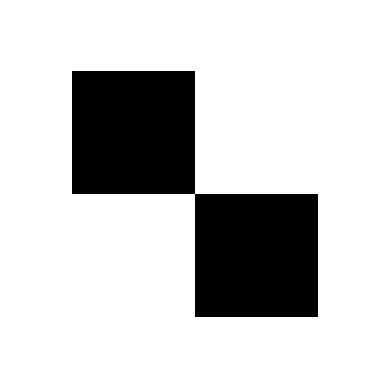

In [13]:
animate_life(new_l, gif_name="beaconTest1")

## Random graph

In [26]:
random_is = np.random.randint(0, 2, size=(100, 100)) 

In [27]:
write_is("random.txt", random_is)

In [28]:
random = load_initial_state("random.txt")

In [29]:
LG = GameOfLife(random, 500)

In [30]:
states = LG.game_of_life()

In [31]:
new_l = clean_results(states, random.shape[1])

MovieWriter ffmpeg unavailable; using Pillow instead.


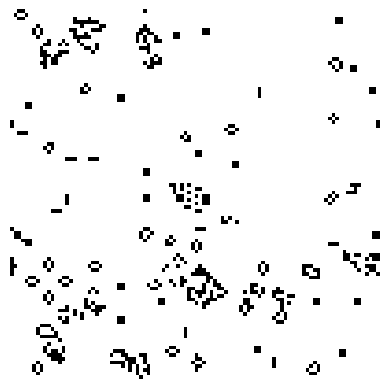

In [32]:
animate_life(new_l, gif_name="random2")

## Pulsar

In [38]:
pulsar = load_initial_state("pulsar.txt")

In [39]:
LG = GameOfLife(pulsar, 500)
pulsar_states = LG.game_of_life()

In [40]:
pulsar_results = clean_results(pulsar_states, pulsar.shape[1])

MovieWriter ffmpeg unavailable; using Pillow instead.


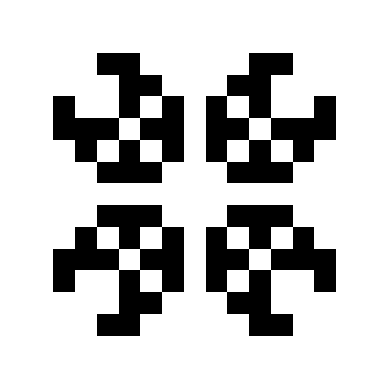

In [41]:
animate_life(pulsar_results, gif_name="pulsar")

In [51]:
tictactoe = load_initial_state("tictactoe.txt")

In [52]:
LG = GameOfLife(tictactoe, 200)
tictactoe_states = LG.game_of_life()

In [53]:
tictactoe_results = clean_results(tictactoe_states, tictactoe.shape[1])

MovieWriter ffmpeg unavailable; using Pillow instead.


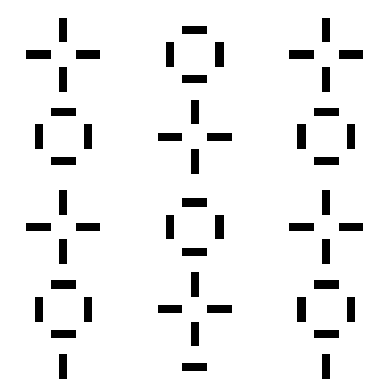

In [54]:
animate_life(tictactoe_results, gif_name="tictactoe")

## Glider explosion

In [70]:
glider = load_initial_state("glider_explosion.txt")

In [71]:
LG = GameOfLife(glider, 500)
glider_states = LG.game_of_life()

In [72]:
glider_results = clean_results(glider_states, glider.shape[1])

MovieWriter ffmpeg unavailable; using Pillow instead.


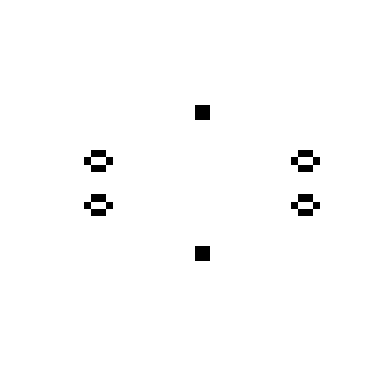

In [73]:
animate_life(glider_results, gif_name="glider")